<a href="https://colab.research.google.com/github/abhinavansh18/trials/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000, n_features=10, n_classes=2,random_state=42)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [4]:
#model trainind
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [5]:
y_pred=lr.predict(x_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [6]:
lr.predict_proba(x_test)

array([[7.74477909e-01, 2.25522091e-01],
       [3.36684957e-02, 9.66331504e-01],
       [6.70682154e-01, 3.29317846e-01],
       [7.98668032e-02, 9.20133197e-01],
       [9.76616650e-01, 2.33833501e-02],
       [4.13572804e-02, 9.58642720e-01],
       [9.79028767e-01, 2.09712329e-02],
       [9.59367261e-01, 4.06327393e-02],
       [8.08520049e-01, 1.91479951e-01],
       [6.84954318e-01, 3.15045682e-01],
       [9.13669448e-01, 8.63305524e-02],
       [2.63597018e-01, 7.36402982e-01],
       [5.25844192e-01, 4.74155808e-01],
       [2.11912354e-01, 7.88087646e-01],
       [7.93592056e-01, 2.06407944e-01],
       [9.46621678e-01, 5.33783219e-02],
       [2.62957933e-02, 9.73704207e-01],
       [3.24212617e-01, 6.75787383e-01],
       [3.14803584e-01, 6.85196416e-01],
       [2.04956217e-01, 7.95043783e-01],
       [5.04587065e-01, 4.95412935e-01],
       [9.66703630e-01, 3.32963696e-02],
       [2.00514796e-01, 7.99485204e-01],
       [7.77891908e-01, 2.22108092e-01],
       [8.729863

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [ ]:
#hyperparamedter tuning

In [10]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear','sag','saga']


In [11]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [12]:
#Grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [13]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [14]:
grid.best_score_

np.float64(0.8785714285714287)

In [16]:
y_pred=grid.predict(x_test)

In [24]:
#ovr
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000, n_features=10, n_informative=3,n_classes=3,random_state=42)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [29]:
#for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification


In [30]:
x,y=make_classification(n_samples=10000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.99],flip_y=0,random_state=10)

In [31]:
Counter(y)

Counter({np.int64(0): 9900, np.int64(1): 100})

In [33]:
import seaborn as sns


<Axes: xlabel='0', ylabel='1'>

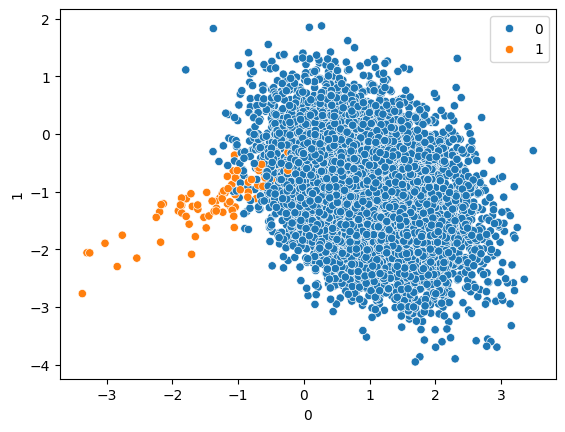

In [35]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear','sag','saga']
class_weight=[{0:w,1:y}for w in [1,10,50,100] for y in [1,10,50,100]]

In [39]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [43]:
#Grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator=lr,param_grid=params,scoring='accuracy',cv=cv,)
grid.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

KeyboardInterrupt: 

In [ ]:
grid.best_params_